In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constant

In [30]:
class Particle:
    def __init__(self,x = 1, y = 1, vx = 1, vy = 1, m = 1):
        self._position = np.array((x,y))
        self._velocity = np.array((vx,vy))
        self._mass = m
        self.momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*self._velocity**2

    @property
    def velocity(self):
        # print("getter method called")
        return self._velocity

    @velocity.setter
    def velocity(self, value):
        # print("setter method called")
        self._velocity = value
        self.momentum = self._velocity*self._mass
        self.energy = 0.5*self._mass*self._velocity**2
        # print(self.energy)
        
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self.momentum = self._velocity*self._mass
        self.energy = 0.5*self._mass*self._velocity**2
            

# Below is testing

# p1 = Particle()
# print(p1.velocity)
# # print(dir(mark))
# p1.velocity = 19
# p1.mass = 3
  
# # print(mark.velocity)
# print(p1.energy)

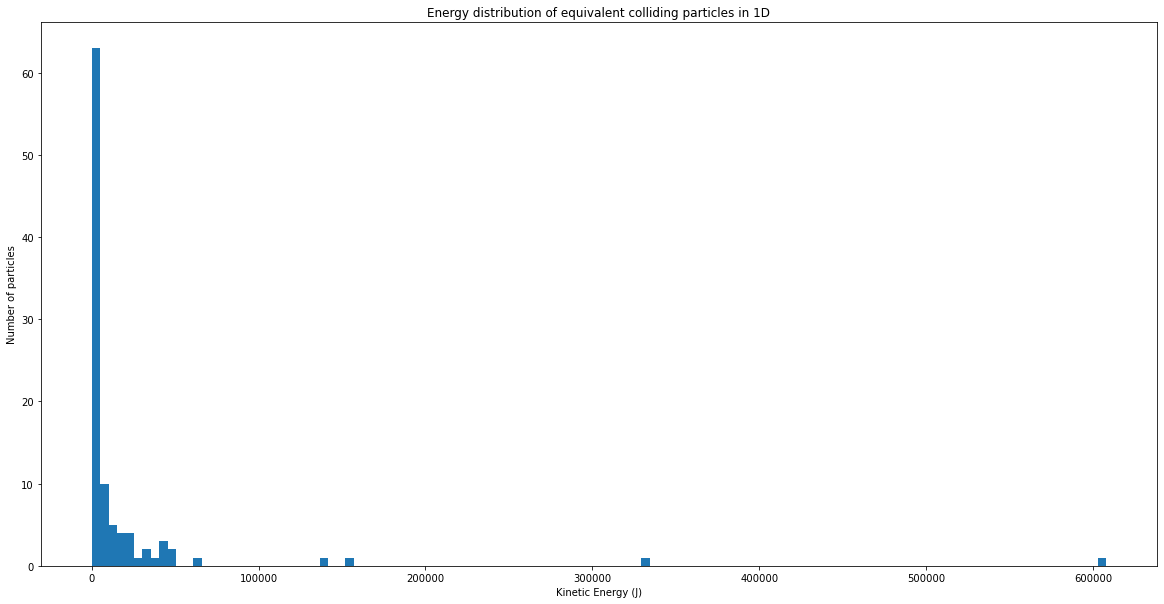

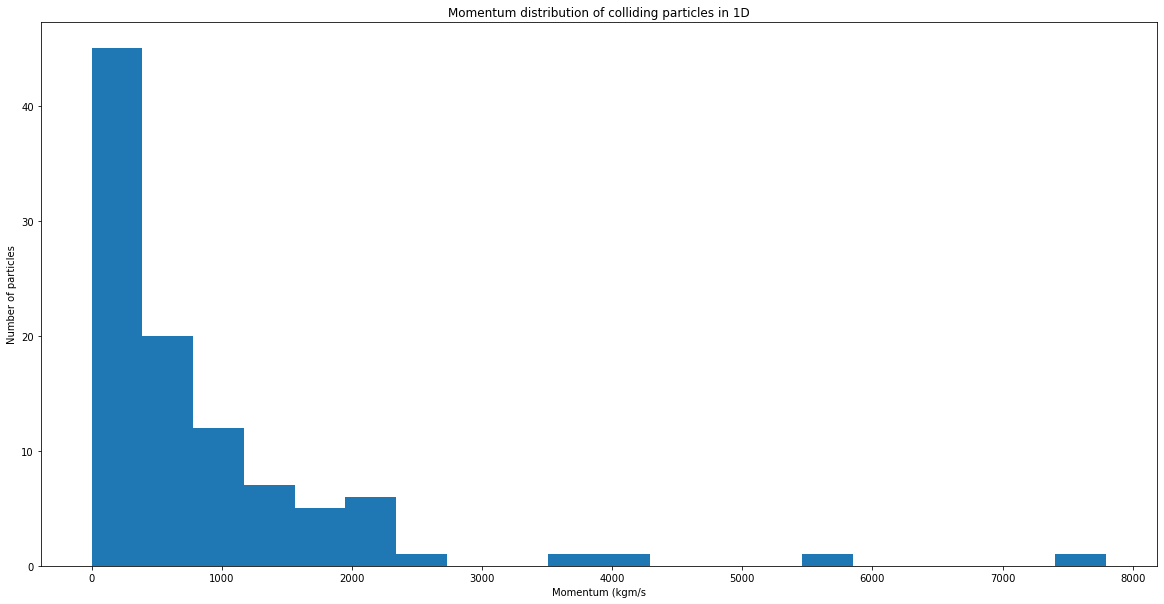

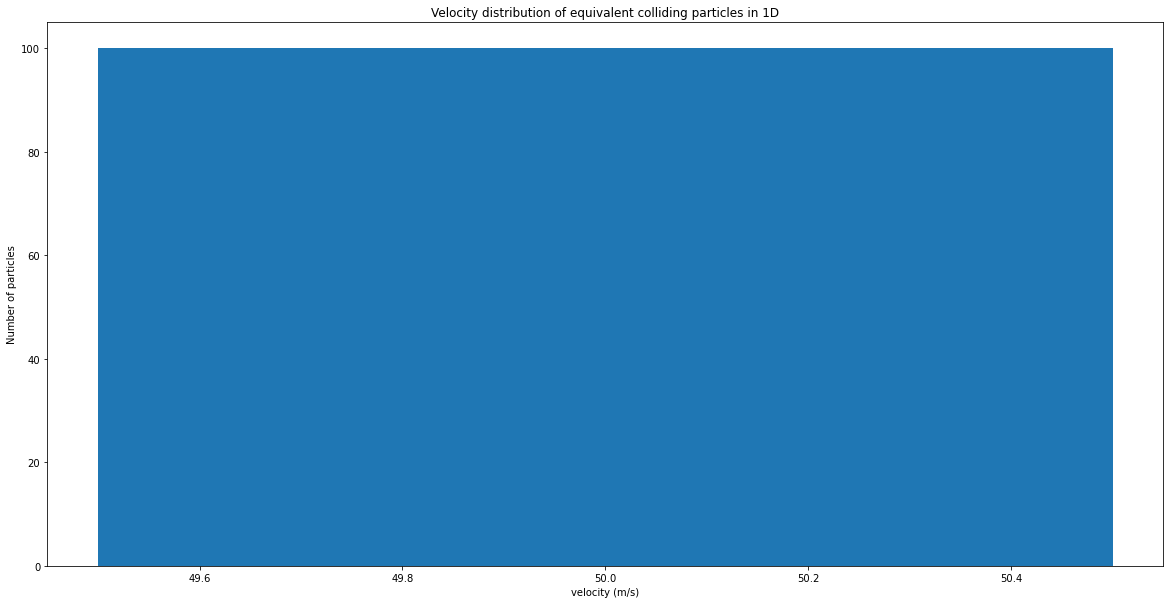

In [70]:
# Creating an array of random numbers for the starting velocities of n particles
no_particles = 100
no_collisions = 10

# Carry out n collisions with velocity transfers
# for i in range(no_collisions):
    # Here we define how the collision transfers energy
    
    # Random transfer of momentum depending on random number
    
    # Transfer of energy depending on mass
    
    # Newtonian Elastic Collision energy transfer
    
    # Inelastic collision
    
    # Interaction through a field
    
# How to randomise choice of particles from array?
# Doesn't matter because each particle has a random velocity anyways.


class Simulation():
    
    def __init__ (self,starting_velocity = 1,particle_mass = 1, no_particles = 100, no_collisions=1000, Temperature = 273):
        self.no_particles = int(no_particles)
        self.no_collisions = int(no_collisions)
        self.T = Temperature
        self.v0 = starting_velocity
        self.m = particle_mass
        
        self.init_particles()
        
    def init_particles(self):
        
        self.particle_history = np.ones([4,self.no_particles,self.no_collisions])
        self.particles = []

        # Creating particle object for each particle in simulation
        for i in range(self.no_particles):
            
            # Creating particle with velocity v0 and mass m
            particle = Particle()
            
            # Updating particle energy and momentum
            # particle.E = 0.5*particle.mass*particle.velocity**2
            # particle.p = particle.m*particle.v
            
            # Adding newly created particle to particle array
            self.particles.append(particle)
            
            # Adding particle properties to history array
            self.particle_history[0,i,0] = particle.velocity
            self.particle_history[1,i,0] = particle.mass
            self.particle_history[2,i,0] = particle.energy
            self.particle_history[3,i,0] = particle.momentum
        
    # Do we want to randomise the number of collisions in any time step
    # Can we have only 1 collision for each particle for each time step
    
    def begin_simulation(self,collision_type = 'random'):
        self.type = collision_type
        
        for step in range(1,self.no_collisions):
            self.step = step
            self.simulate_set_of_collisions()
        
        self.plot_energy_histogram()
        self.plot_momentum_histogram()
        self.plot_velocity_histogram()
        
        
    def simulate_set_of_collisions(self):
        # Randomise which particle is being collided with using randomised collision array as an index for collisions
        collision_partner = np.array(range(0,self.no_particles))
        np.random.shuffle(collision_partner)
        
        # number of collisions = number of particles/2
        for i in range(int(self.no_particles/2)):
            
            #index for collisions partners
            index1 = collision_partner[i]
            index2 = collision_partner[(i+int(self.no_particles/2)) % self.no_particles] # modulus to wrap array indices
            
            # Calling the collision method
            self.collision(self.particles[index1],self.particles[index2])
            
            # Updating particle history
            
            #velocity
            self.particle_history[0,index1,self.step] = self.particles[index1].velocity
            self.particle_history[0,index2,self.step] = self.particles[index2].velocity
            
            # mass
            self.particle_history[1,index1,self.step] = self.particles[index1].mass
            self.particle_history[1,index2,self.step] = self.particles[index2].mass
            
            # energy
            self.particle_history[2,index1,self.step] = self.particles[index1].energy
            self.particle_history[2,index2,self.step] = self.particles[index2].energy
            
            # momentum
            self.particle_history[3,index1,self.step] = self.particles[index1].momentum
            self.particle_history[3,index2,self.step] = self.particles[index2].momentum
            
    def collision(self,particle1,particle2):
        
        # Select for type of collision
        if self.type == 'random':
            self.random_collision(particle1,particle2)
        
            
    def random_collision(self,particle1,particle2):
        
        # mv + m'v' (before) = mv + m'v' (after) 
        p_before = particle1.mass*particle1.velocity + particle2.mass*particle2.velocity
        
        # Randomise transfer of energy between 2 particles
        fractional_momentum_transfer = np.random.random()
        
        
        p_after_1 = fractional_momentum_transfer*p_before
        p_after_2 = (1-fractional_momentum_transfer)*p_before
        
        v_after_1 = p_after_1/particle1.mass
        v_after_2 = p_after_2/particle2.mass
        # Returning velocities after the collision
        
        particle1.velocity = v_after_1
        particle2.velocity = v_after_2
    

    

    
    def plot_energy_histogram(self):
            
        # Convert from continuous Kinetic Energies to discrete bins
        plt.hist(self.particle_history[2,-1,:],bins='auto')
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Kinetic Energy (J)')
        plt.ylabel('Number of particles')
        plt.title('Energy distribution of equivalent colliding particles in 1D')
        plt.show()
        
    def plot_momentum_histogram(self):
            
        # Convert from continuous Kinetic Energies to discrete bins
        plt.hist(self.particle_history[3,-1,:],bins='auto')
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Momentum (kgm/s')
        plt.ylabel('Number of particles')
        plt.title('Momentum distribution of colliding particles in 1D')
        plt.show()
        
    
    def plot_velocity_histogram(self):
            
        # Convert from continuous Kinetic Energies to discrete bins
        plt.hist(self.particle_history[1,-1,:],bins='auto')
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('velocity (m/s)')
        plt.ylabel('Number of particles')
        plt.title('Velocity distribution of equivalent colliding particles in 1D')
        plt.show()
        
        
        
        
sim = Simulation(no_collisions=100)

sim.begin_simulation()


# print(sim.particle_history[0,:,1]) 

# Maxwell-Boltzmann Distribution
The Maxwell-Boltzmann Distribution in 1 Dimension has the form:
$$ f_{1D}(v_i)=\left(\frac{m}{2πkT}\right)^{1/2} exp\left(\frac{−mv_i^2}{2kT}\right),$$
where $v_i$ is the velocity for a particle, $m$ is the mass of the particles, $k$ is the Boltzmann constant, and $T$ is temperature in Kelvin. Where the average particle velocity is:
$$\langle |v| \rangle = \left( \frac{2kT}{\pi m} \right)^{1/2}$$
To interpret as speed and not velocity the distribution becomes:
$$f = 2\sqrt{\frac{\alpha}{\pi}}e^{-\alpha v^2}$$
f=2(απ)12e−αv2dv.

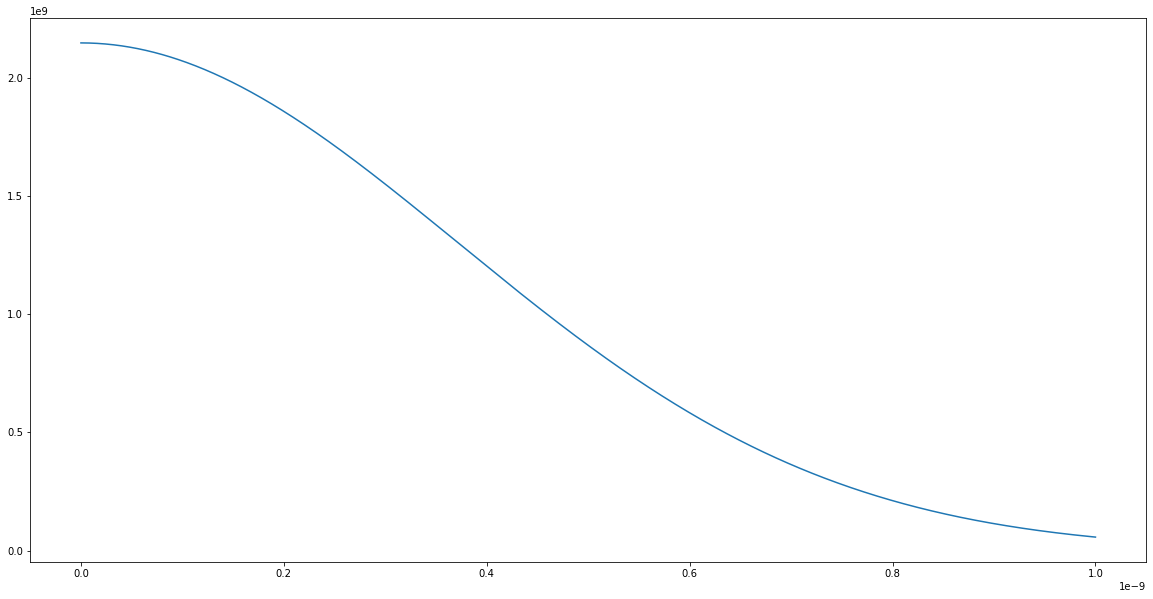

In [69]:
import numpy as np
import scipy.constants as constant
import math

def Maxwell_Boltzmann_1D(v,alpha=1,m=1,T=10000):
    # Simplified
    # f = 2*np.sqrt(alpha/np.pi)*np.exp(-alpha*v**2)
    
    # Specific to system
    f = 2*np.sqrt(m/(2*np.pi*constant.k*T))*np.exp(-(m*v**2)/(2*constant.k*T))
    return f
    # return np.sqrt(m/(2*np.pi*constant.k*T))*np.exp(-(m*v**2)/(2*constant.k*T))

v = np.linspace(0,10**(-9),1000)

fig, axes = plt.subplots(1,1)

axes.plot(v,Maxwell_Boltzmann_1D(v))
plt.show()